### Import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
#import os

### Customize

In [2]:
# Customize parameters
my_input_file='0404 my_input.csv'
my_features = ['Daily_Sales', 'Profit_Margin', 'Inventory_Turnover', 'Customer_Footfall']
my_scatter_plot="0404 cluster_3d_scatter.png"
my_bar_prefix ="0404 bar_chart"


### Load and prepare data, apply k-means

In [3]:
# Read data
data = pd.read_csv(my_input_file)

# Normalize Features 
X = data[my_features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### Apply K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
data['Cluster'] = kmeans.fit_predict(X_scaled)

C:\Users\ahmed\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


### Visualize and save cluster 

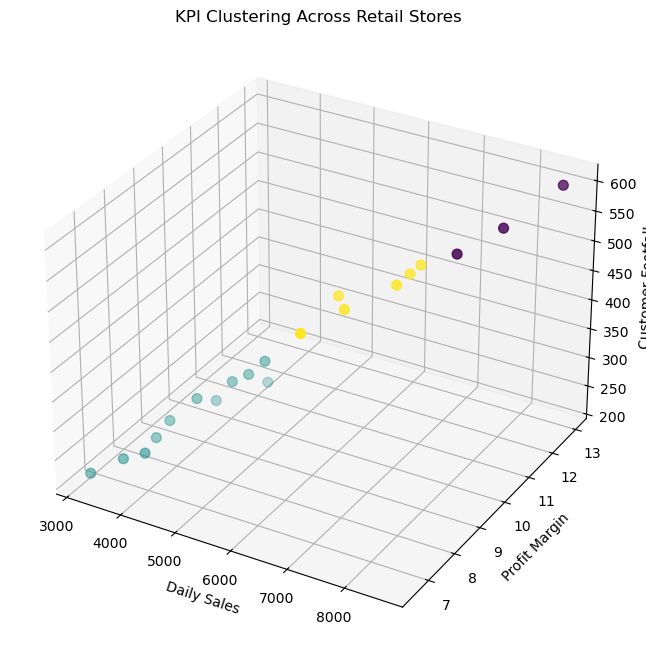

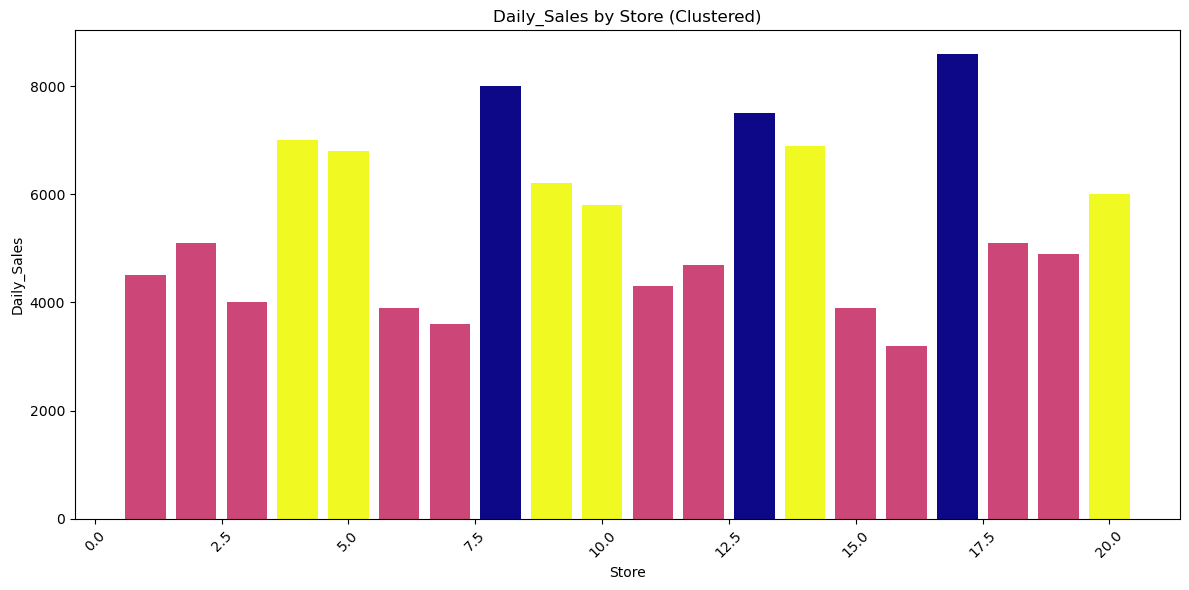

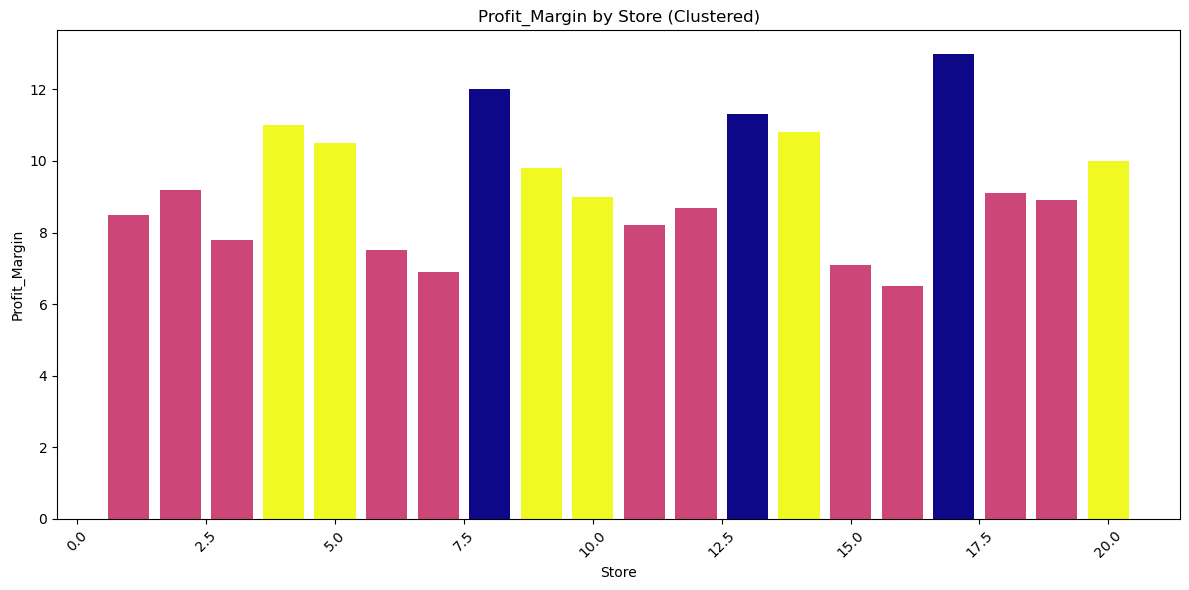

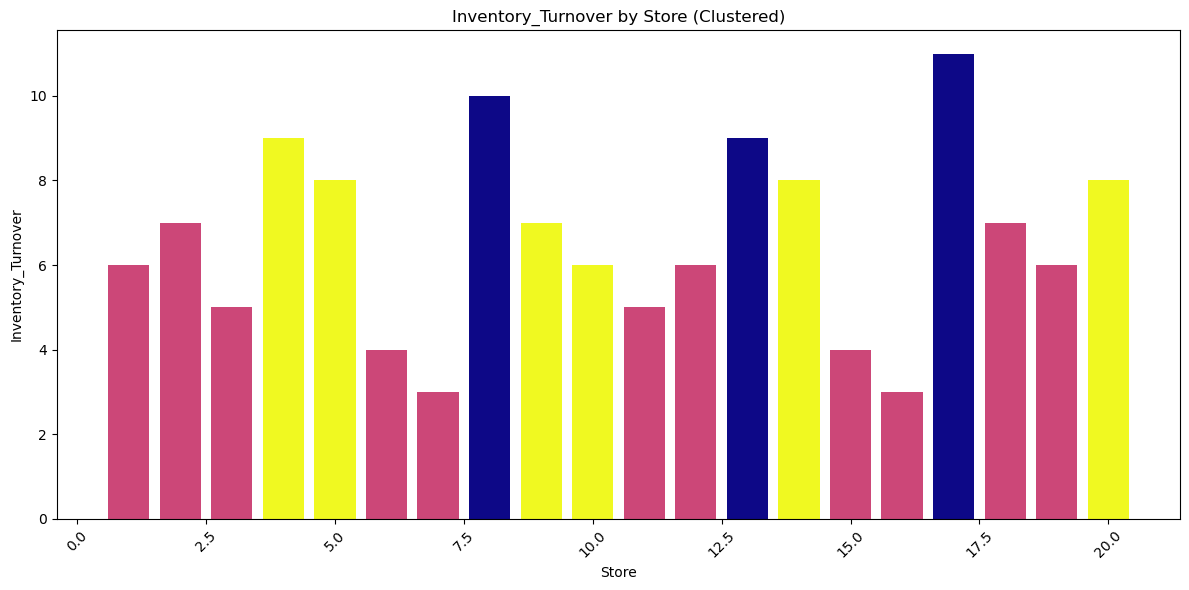

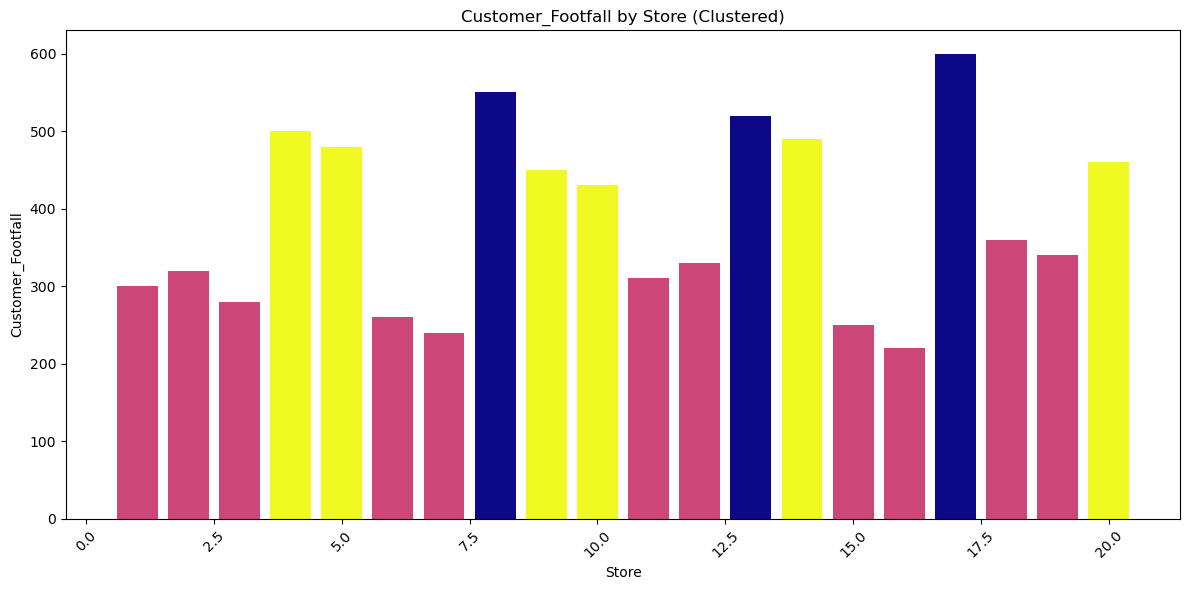

In [4]:
# Visualize KPI Clusters

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(
    data['Daily_Sales'],
    data['Profit_Margin'],
    data['Customer_Footfall'],
    c=data['Cluster'],
    cmap='viridis',
    s=50
)

ax.set_title("KPI Clustering Across Retail Stores")
ax.set_xlabel("Daily Sales")
ax.set_ylabel("Profit Margin")
ax.set_zlabel("Customer Footfall")

plt.savefig(my_scatter_plot)
plt.show()


#  Save Bar Charts with Prefix

for kpi in my_features:
    plt.figure(figsize=(12, 6))
    bars = plt.bar(data['Store'], data[kpi], color=plt.cm.plasma(data['Cluster'] / data['Cluster'].max()))
    plt.xticks(rotation=45)
    plt.title(f"{kpi} by Store (Clustered)")
    plt.xlabel("Store")
    plt.ylabel(kpi)
    
    filename = f"{my_bar_prefix}_{kpi.replace(' ', '_')}.png"
    plt.tight_layout()
    plt.savefig(filename)
    plt.show()